                                                           Zillow Group
                                                   

La industria inmobiliaria desempeña un papel fundamental en las economías de los países porque permiten el desarrollo social y urbano, generando una fuente importante de empleos donde se realizan procesos de contratación del personal capacitado como lo son ingenieros, arquitectos, maestros, diseñadores, entre otros. Igualmente, la venta de casas genera inversión y gran flujo de dinero, activándose  un sector importante de la economía  que posibilita adquirir bienes y  acumular riqueza. Además, las viviendas son una necesidad básica porque las personas necesitan un refugio para resguardarse, sentir seguridad y es el lugar de asentamiento de las familias. Asimismo, según datos de Fernández (2022), en Estados Unidos para el 2020 se compraron 820.000 viviendas, es decir se generó un aumento del 16% con respecto a las ventas del año 2019 que fueron de 683.000. Por lo mencionado anteriormente, la empresa Zillow Group, según Gutiérrez (2021), se dedica a ofrecer información sobre bienes raíces residenciales, los cuales estén a la venta en el condado Iowa, ciudad de Ames ofreciendo diferentes datos de mercado y herramientas para que los compradores y vendedores en el sector inmobiliario tomen decisiones apropiadas. Es por esto, que la empresa quiere hacer un modelo de regresión lineal múltiple que le permita predecir el precio de viviendas en esa ciudad a partir de diferentes valores de entrada como lo son el tamaño del lote, tamaño de la casa, cantidad de baños, entre otras.  

In [1]:
#importar librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

#Importar base de datos
df = pd.read_csv("base_de_datos_precio_viviendas.csv", delimiter=";")
print (df.head())

   MSSubClass MSZoning  LotArea LotConfig Neighborhood  YearBuilt  \
0          60       RL     8450    Inside      CollgCr       2003   
1          20       RL     9600       FR2      Veenker       1976   
2          60       RL    11250    Inside      CollgCr       2001   
3          70       RL     9550    Corner      Crawfor       1915   
4          60       RL    14260       FR2      NoRidge       2000   

   TotalBsmtSF  GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  \
0          856       1710         2             1             8         548   
1         1262       1262         2             1             6         460   
2          920       1786         2             1             6         608   
3          756       1717         1             1             7         642   
4         1145       2198         2             1             9         836   

   YrSold  SalePrice  
0    2008     208500  
1    2007     181500  
2    2008     223500  
3    2006     1400

                             Descripción de la base de datos

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   MSZoning      1460 non-null   object
 2   LotArea       1460 non-null   int64 
 3   LotConfig     1460 non-null   object
 4   Neighborhood  1460 non-null   object
 5   YearBuilt     1460 non-null   int64 
 6   TotalBsmtSF   1460 non-null   int64 
 7   GrLivArea     1460 non-null   int64 
 8   FullBath      1460 non-null   int64 
 9   KitchenAbvGr  1460 non-null   int64 
 10  TotRmsAbvGrd  1460 non-null   int64 
 11  GarageArea    1460 non-null   int64 
 12  YrSold        1460 non-null   int64 
 13  SalePrice     1460 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 159.8+ KB


La base de datos no presenta datos faltantes y esta compuesta por 3 variables categóricas, 10 numéricas y 1 variables cuantificada que es MSSubClass.

In [3]:
df.shape

(1460, 14)

Tiene 1460 filas y 14 colum

In [4]:
df.describe()

,MSSubClass,LotArea,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,KitchenAbvGr,TotRmsAbvGrd,GarageArea,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,1971.267808,1057.429452,1515.463699,1.565068,1.046575,6.517808,472.980137,2007.815753,180921.195890
std,42.300571,9981.264932,30.202904,438.705324,525.480383,0.550916,0.220338,1.625393,213.804841,1.328095,79442.502883
min,20.000000,1300.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,1954.000000,795.750000,1129.500000,1.000000,1.000000,5.000000,334.500000,2007.000000,129975.000000
50%,50.000000,9478.500000,1973.000000,991.500000,1464.000000,2.000000,1.000000,6.000000,480.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,2000.000000,1298.250000,1776.750000,2.000000,1.000000,7.000000,576.000000,2009.000000,214000.000000
max,190.000000,215245.000000,2010.000000,6110.000000,5642.000000,3.000000,3.000000,14.000000,1418.000000,2010.000000,755000.000000


In [5]:
df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
Neighborhood    0
YearBuilt       0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
KitchenAbvGr    0
TotRmsAbvGrd    0
GarageArea      0
YrSold          0
SalePrice       0
dtype: int64

In [6]:
df.nunique()

MSSubClass        15
MSZoning           5
LotArea         1073
LotConfig          5
Neighborhood      25
YearBuilt        112
TotalBsmtSF      721
GrLivArea        861
FullBath           4
KitchenAbvGr       4
TotRmsAbvGrd      12
GarageArea       441
YrSold             5
SalePrice        663
dtype: int64

                                 Visualización de las variables
                                           categóricas

<Axes: xlabel='MSSubClass', ylabel='count'>

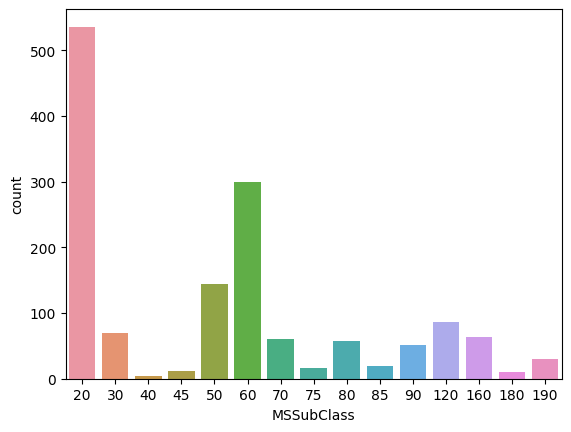

In [7]:
sns.countplot(x="MSSubClass",data=df)


En la variable MSSubClass la cual identifica el tipo de vivienda objeto de venta, se puede ver que del total de casas del dataset más de 500 casas son del tipo 1-STORY 1946 & NEWER ALL STYLES, seguidas de 2-STORY 1946 & NEWER con aproximadamente 300 casas, con lo cual se concluye que la mayoría de las personas prefieren comprar este tipo de casas a diferencia de las demás que se ofrecen en el mercado

<Axes: xlabel='MSZoning', ylabel='count'>

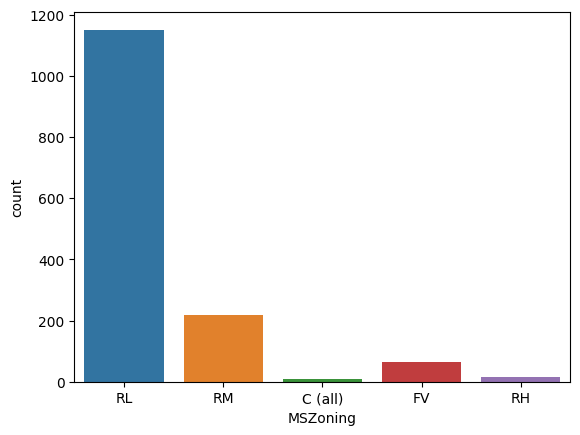

In [8]:

sns.countplot(x="MSZoning",data=df)

La variable MSZoning Identifica la clasificación general de zonificación de la venta se puede apreciar que aproximadamente 1100 casas son residenciales de baja densidad lo cual significa que del 100% de las casas el 75% corresponden a este tipo, con lo cual se puede concluir que las personas prefieren comprar las casas en esta zonificación especifica. 

<Axes: xlabel='LotConfig', ylabel='count'>

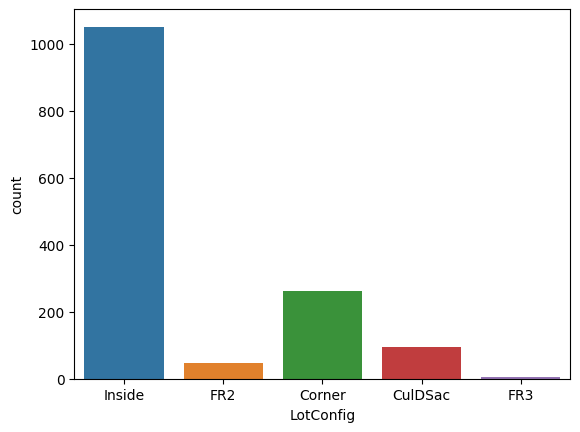

In [9]:

sns.countplot(x="LotConfig",data=df)

En variable de LotConfig se hace referencia a la configuración del lote, es decir, si el lote es esquinero o esta en la mitad de 2 casas, entre otras. Se concluye que aproximadamente 1050 lotes corresponden a la variable Inside que significa lote interior, con lo cual los clientes prefieren en su mayoría esta distribución para la elección de sus casas.

<Axes: xlabel='Neighborhood', ylabel='count'>

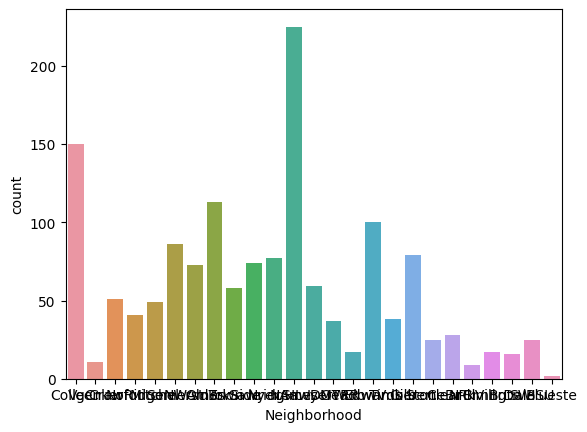

In [10]:
sns.countplot(x="Neighborhood",data=df)



In [11]:
df["Neighborhood"].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

La variable Neighborhood   muestra la ubicación física dentro de los límites de la ciudad de Ames podemos concluir que los vecindarios donde mayores casas hay vendidas son North Ames con 225, College Creek con 150, Old Town con 113 y Edwards con 100. Las cuales representa el 40% del total de casas vendidas en la ciudad de Ames.

                                 Visualización de las variables 
                                numéricas y tratamiento de outliers                   

En las variables numéricas se realizaron los diagramas de cajas o boxplot las cuales permiten visualizar los valores atípicos de una serie de datos, que son valores extremadamente amplios o bajos en comparación con los demás datos de la gráfica. Además, el boxplot indica los cuartiles y la mediana de los valores. Luego, se hizo el tratamiento de “outliers” para cada variable, es decir se eliminó los valores atípicos para poder mejorar la precisión del modelo al momento de hacer la regresión lineal múltiple.
En cuanto a poder eliminar los outliers es necesario primero seleccionar la variable numérica y luego calcular el rango intercuartílico (IQR); en donde el primer cuartil es el 25% del percentil y el tercer cuartil es el 75% del percentil. Luego de hacer esto, se calculan los limites del boxplot y se filtran los datos y por ultimo se crean los boxplot para visualizar los datos originales y filtrados. A continuación, se muestra las variables numéricas originales y al lado con el tratamiento de datos.


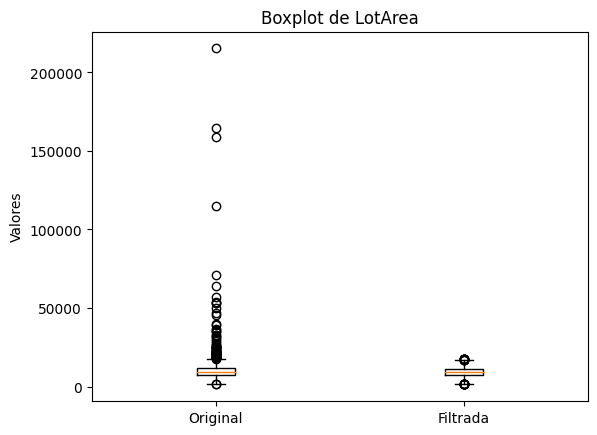

In [12]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'LotArea'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

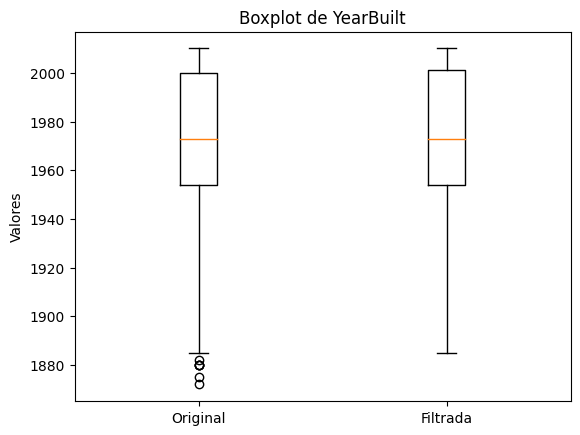

In [13]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'YearBuilt'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered_1 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_1[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

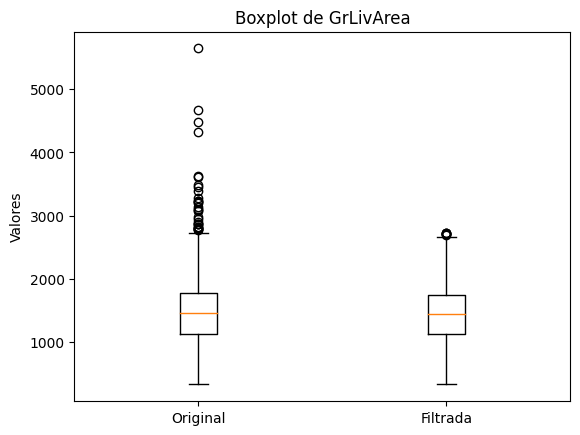

In [14]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'GrLivArea'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtra los datos para eliminar los outliers
data_filtered_2 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_2[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

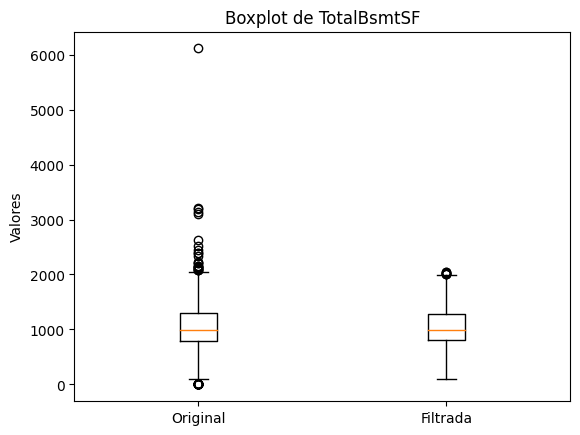

In [15]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'TotalBsmtSF'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtra los datos para eliminar los outliers
data_filtered_3 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_3[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

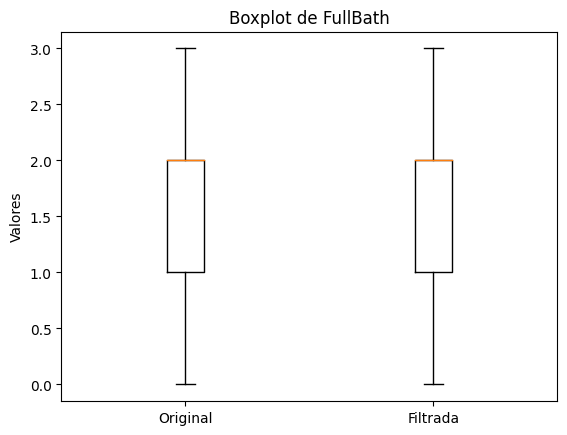

In [16]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'FullBath'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtra los datos para eliminar los outliers
data_filtered_4 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_4[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

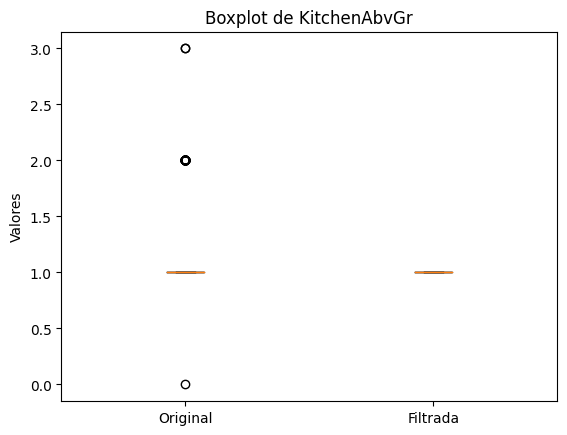

In [17]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'KitchenAbvGr'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtra los datos para eliminar los outliers
data_filtered_5 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_5[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

In [18]:
df["KitchenAbvGr"].value_counts()

KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64

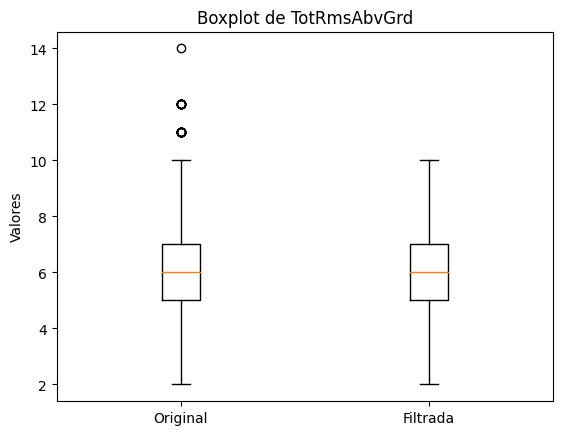

In [19]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'TotRmsAbvGrd'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtra los datos para eliminar los outliers
data_filtered_6 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_6[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

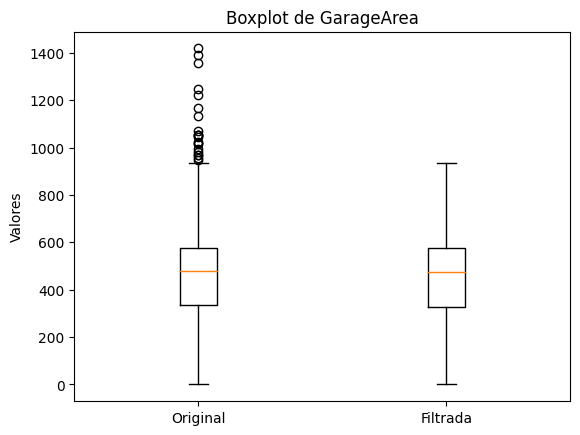

In [20]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest= 'GarageArea'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtra los datos para eliminar los outliers
data_filtered_7 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_7[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

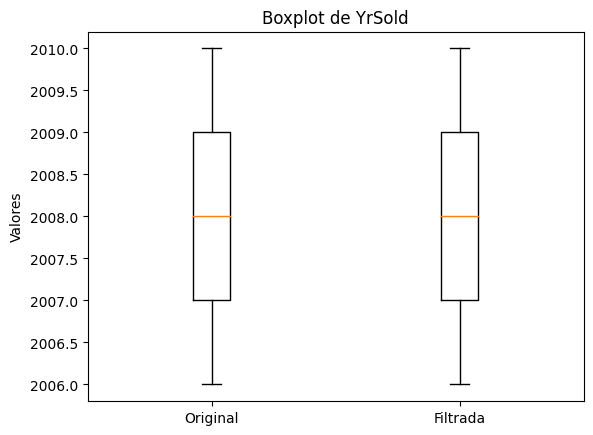

In [21]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'YrSold'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtra los datos para eliminar los outliers
data_filtered_8 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_8[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

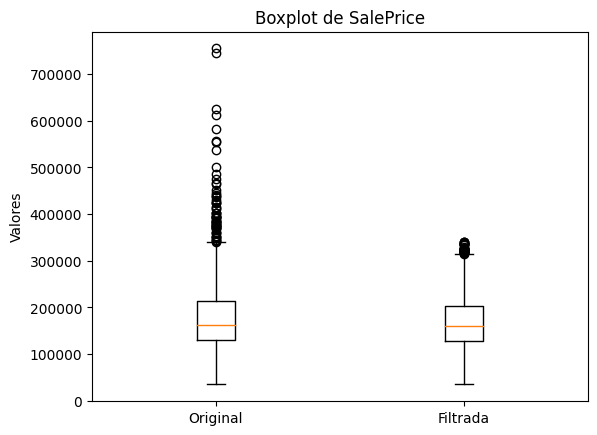

In [22]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'SalePrice'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtra los datos para eliminar los outliers
data_filtered_9 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_9[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

                                 Correlaciones                  

Se realizo las correlaciones de todas las variables del Dataset con el objetivo de poder analizar datos, identificando relaciones entre las variables. Además, se generó validaciones en el modelo con la meta de proporcionar buenas medidas predictoras. Por otro lado, los valores de la correlación varían entre -1 y 1. Es decir, que si el valor de una variable esta cercana a uno, la otra tiende a aumentar, pero si esta cercana a -1 tiende a disminuir.

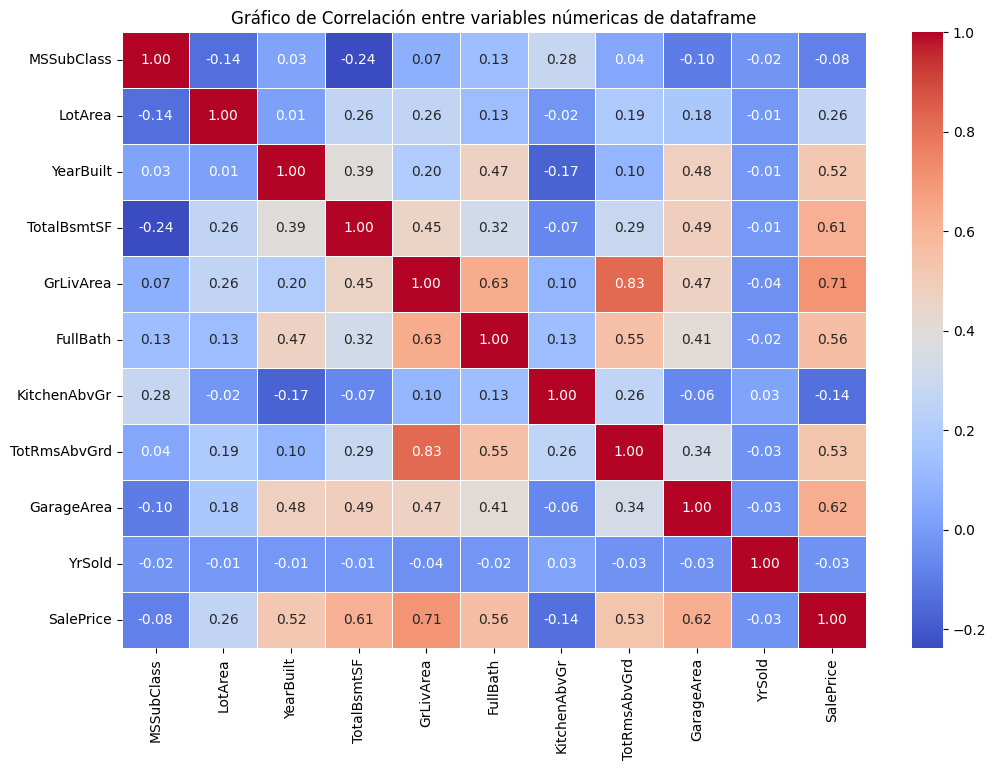

In [23]:
variables_numericas= ["MSSubClass","LotArea","YearBuilt",
              "TotalBsmtSF","GrLivArea","FullBath","KitchenAbvGr","TotRmsAbvGrd",
              "GarageArea","YrSold","SalePrice"]

matriz_correlacion=df[variables_numericas].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Gráfico de Correlación entre variables númericas de dataframe")
plt.show()

Para la variable dependiente precio de venta podemos ver que las variables independientes que mayor correlacion positiva y negativa tienen respectivamente son  GrLivArea y KitchenAbvGr las cuales son Superficie habitable sobre el nivel del suelo (suelo) en pies cuadrados y cantidad de cocinas superiores 

                            Creación de variables Dummies

En este paso lo que se realiza es que las variables categóricas se pasan a numéricas. Es decir, se vuelven 0 y 1 para poder evitar posibles errores

In [24]:
df= pd.get_dummies(df,drop_first=True)
#Pasamos los datos boolenaos de True/Flase a 1/0.
df = df.astype(int)

                             Regresión Lineal Multiple
                                  método rápido
                                

In [25]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sn

X_multi=df.drop(columns=["SalePrice"],axis=1)
X_multi.head()
y_multi = df["SalePrice"].astype(float)
X_multi_cons=sn.add_constant(X_multi)
lm_multi=sn.OLS(y_multi, X_multi_cons).fit()
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     136.1
Date:                Tue, 29 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:55:46   Log-Likelihood:                -17364.
No. Observations:                1460   AIC:                         3.481e+04
Df Residuals:                    1417   BIC:                         3.504e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.791e+06   1.46e+06     -1.230      0.219   -4.65e+06    1.06e+06
MSSubClass            -131.1664     31.298     -4.191      0.000    -192.563     -69.770
LotArea                  0.4320      0.111      3.908      0.000       0.215       0.649
YearBuilt              486.1726     73.018      6.658      0.000     342.938     629.407
TotalBsmtSF             22.3277      3.055      7.308      0.000      16.334      28.321
GrLivArea               59.0428      4.300     13.732      0.000      50.609      67.477
FullBath              2917.3703   2722.754      1.071      0.284   -2423.692    8258.432
KitchenAbvGr         -3.131e+04   5206.635     -6.014      0.000   -4.15e+04   -2.11e+04
TotRmsAbvGrd          2236.3906   1159.998      1.928      0.054     -39.108    4511.889
GarageArea              39.5260      6.074      6.508      0.000      27.611      51.441
YrSold                 429.1963    719.604      0.596      0.551    -982.408    1840.800
MSZoning_FV           3.391e+04   1.66e+04      2.042      0.041    1336.915    6.65e+04
MSZoning_RH           3.514e+04   1.68e+04      2.096      0.036    2259.157     6.8e+04
MSZoning_RL           3.944e+04   1.38e+04      2.859      0.004    1.24e+04    6.65e+04
MSZoning_RM           3.984e+04   1.29e+04      3.085      0.002    1.45e+04    6.52e+04
LotConfig_CulDSac     1.215e+04   4492.936      2.704      0.007    3336.392     2.1e+04
LotConfig_FR2        -7072.9068   5861.425     -1.207      0.228   -1.86e+04    4425.097
LotConfig_FR3        -1.854e+04   1.84e+04     -1.006      0.315   -5.47e+04    1.76e+04
LotConfig_Inside       730.9787   2527.639      0.289      0.772   -4227.338    5689.296
Neighborhood_Blueste -1.676e+04   2.74e+04     -0.611      0.541   -7.06e+04     3.7e+04
Neighborhood_BrDale   -2.22e+04   1.38e+04     -1.614      0.107   -4.92e+04    4790.355
Neighborhood_BrkSide -5658.0734   1.19e+04     -0.477      0.634   -2.89e+04    1.76e+04
Neighborhood_ClearCr -3931.7527   1.19e+04     -0.330      0.741   -2.73e+04    1.94e+04
Neighborhood_CollgCr -6890.5660   9579.111     -0.719      0.472   -2.57e+04    1.19e+04
Neighborhood_Crawfor  2.562e+04   1.12e+04      2.278      0.023    3561.142    4.77e+04
Neighborhood_Edwards -2.813e+04   1.03e+04     -2.729      0.006   -4.83e+04   -7912.018
Neighborhood_Gilbert -1.215e+04      1e+04     -1.210      0.226   -3.18e+04    7542.852
Neighborhood_IDOTRR  -1.597e+04   1.36e+04     -1.170      0.242   -4.27e+04    1.08e+04
Neighborhood_MeadowV -2.207e+04   1.36e+04     -1.624      0.105   -4.87e+04    4589.276
Neighborhood_Mitchel -1.909e+04   1.06e+04     -1.797      0.073   -3.99e+04    1752.817
Neighborhood_NAmes   -1.849e+04   9957.344     -1.857      0.063    -3.8e+04    1037.941
Neighborhood_NPkVill -1.136e+04    1.5e+04     -0.755    

Luego de realizar la regresión lineal múltiple por el método rápido, se analizó el coeficiente de determinación y se concluye que mientras más cerca este al valor de 1, se supone que el modelo se ajusta mejor a los datos.  En el caso de la empresa Zillow Group con la base de datos suministrada se puede observar que el R cuadrado es de 0.801 lo que quiere decir que el 80% del cambio de la variable dependiente (SalePrice) se puede predecir y explicar por medio de la regresión lineal múltiple utilizada. Por lo tanto, se puede deducir que se considera alto y que en gran medida el modelo se ajusta a los valores.

                                 Regresión lineal
                                Método matricial

In [26]:
# Todas las columnas excepto 'SalePrice' como variables independientes
X = df.drop(columns=['SalePrice']).values 
# Variable dependiente 
y = df['SalePrice'].values

In [27]:
# Agregamos una columna de unos para la constante (intercepto)
X_matrix = np.column_stack((np.ones(X.shape[0]), X))

In [28]:
# Calculamos los coeficientes utilizando la fórmula matricial (X^T * X)^(-1) * X^T * y
coeficientes = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y

In [29]:
# Calcular las predicciones
predicciones = X_matrix @ coeficientes

In [30]:
# Calculamos el error residual
residual = y - predicciones

In [31]:
# Grados de libertad
n = len(y)
p = X_matrix.shape[1] - 1
dof = n - p - 1

In [32]:
# Calcular el error estándar residual (RSE)
rse= np.sqrt(np.sum(residual**2) / dof)

In [33]:
# Calcular el coeficiente de determinación R2
total_sum_squares = np.sum((y - np.mean(y))**2)
explained_sum_squares = np.sum((predicciones - np.mean(y))**2)
r_squared = explained_sum_squares / total_sum_squares

In [34]:
# Calcular la estadística F
f_statistic = (explained_sum_squares / p) / (residual.T @ residual / dof)

In [35]:
# Crear una tabla con los resultados
results_table = pd.DataFrame({
    'Coeficiente': coeficientes,
    'Error estándar': np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * rse**2),
    'Estadístico t': coeficientes / np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * rse**2),
    'Valor p': 2 * (1 - stats.t.cdf(np.abs(coeficientes / np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * rse**2)), dof)),
}, index=['Intercepto'] + df.drop(columns=['SalePrice']).columns.tolist())  # Nombres de las características

In [36]:
print("Resultados de la Regresión:")
print(results_table)
print("\nResidual Standard Error:", rse)
print("Coeficiente de determinación R2:", r_squared)
print("Estadística F:", f_statistic)

Resultados de la Regresión:
                       Coeficiente  Error estándar  Estadístico t  \
Intercepto           -1.790586e+06    1.455417e+06      -1.230290   
MSSubClass           -1.311664e+02    3.129848e+01      -4.190824   
LotArea               4.319592e-01    1.105446e-01       3.907557   
YearBuilt             4.861726e+02    7.301776e+01       6.658280   
TotalBsmtSF           2.232770e+01    3.055365e+00       7.307703   
GrLivArea             5.904283e+01    4.299581e+00      13.732228   
FullBath              2.917370e+03    2.722754e+03       1.071478   
KitchenAbvGr         -3.131164e+04    5.206635e+03      -6.013797   
TotRmsAbvGrd          2.236391e+03    1.159998e+03       1.927926   
GarageArea            3.952601e+01    6.073872e+00       6.507549   
YrSold                4.291963e+02    7.196041e+02       0.596434   
MSZoning_FV           3.391118e+04    1.660563e+04       2.042149   
MSZoning_RH           3.514335e+04    1.676363e+04       2.096405   
MSZoni

                             Referencias
                                

Fernandez, R. (20 de Septiembre de 2022). Statista. Obtenido de https://es.statista.com/estadisticas/634572/numero-de-viviendas-vendidas-en-estados-unidos-1995/

Gutierrez, I. (5 de Agosto de 2021). Muy financiero. Obtenido de https://muyfinanciero.com/empresas/zillow/

Habitad Mexico. (S.f). Obtenido de https://www.habitatmexico.org/vivienda-derecho#:~:text=La%20vivienda%20adecuada%20es%20una,individuales%2C%20sino%20de%20n%C3%BAcleos%20familiares

